In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import SVR
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"

In [4]:
df = pd.read_csv(path)
df.head()

df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.svm import SVR
svr = SVR(kernel = 'linear',C = 1000)


from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_train_std)
sc= StandardScaler().fit(X_train)

svr.fit(X_train_std, y_train)
yhat = svr.predict(X_test_std)
y_train_hat = svr.predict(X_train_std)

from sklearn.metrics import r2_score
print("R2 score: ", r2_score(y_test, yhat))
print("R2 score: ", r2_score(y_train, y_train_hat))


float64
float64
float64
float64
float64
float64
float64
float64
[[-0.62332705 -0.89908668  1.3624006  ...  0.33506966  3.36269123
  -3.36269123]
 [ 0.17453157  0.77010378 -0.83980118 ... -0.02818713 -0.29738086
   0.29738086]
 [-0.62332705  1.16463971  1.56568077 ... -0.59901923  3.36269123
  -3.36269123]
 ...
 [ 0.17453157  0.95219729 -0.83980118 ... -0.93047013 -0.29738086
   0.29738086]
 [ 0.17453157 -0.56524859 -0.94144126 ... -0.82735207 -0.29738086
   0.29738086]
 [-1.42118568 -1.74885637  0.63398001 ... -0.47216765 -0.29738086
   0.29738086]]
R2 score:  0.6757187110867399
R2 score:  0.8510467833352235


Text(0.5, 0, 'Price (in dollars)')

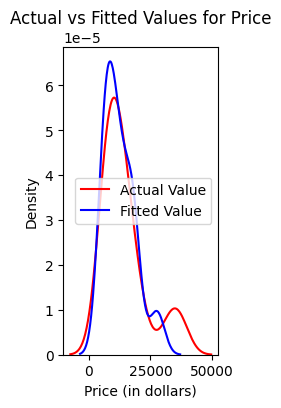

In [5]:
import seaborn as sns
plt.figure(figsize=(2, 4))

ax1 = sns.kdeplot(y_test, color = 'r', label = 'Actual Value')
ax2 = sns.kdeplot(yhat, color = 'b', label = 'Fitted Value')
plt.legend()

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')


In [37]:
#now try with flower dataset
from pathlib import Path
import os.path
dataset_path = Path("/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-Recognition/flowers")
filepaths = list(dataset_path.glob(r'**/*.jpg'))
classes = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

import os
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths=pd.Series(filepaths,name='Filepath').astype(str) 
labels=pd.Series(labels,name='Label')            
image_df = pd.concat([filepaths, labels], axis=1) 

image_df = image_df.sample(frac=1).reset_index(drop = True)
image_df.head(5)

#resize all images to 64x64 using pillow
from PIL import Image
def resize_image(filepath):
    img = Image.open(filepath)
    img = img.resize((64,64))
    return img

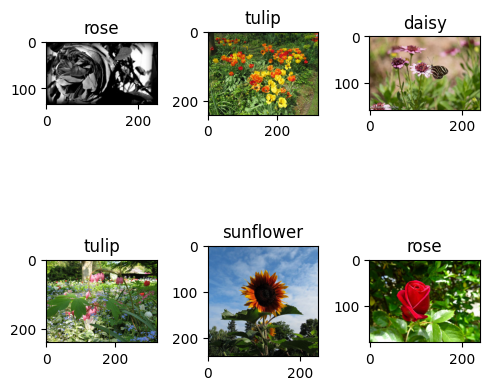

In [38]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(5,5),subplot_kw={})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [28]:
train_df ,test_df=train_test_split(image_df, train_size=0.9, shuffle=True, random_state=1)

#extract features




(3885, 2)